In [1]:
import os
import numpy as np
WORK_DIR = '/var/workplace/PySparseConvNet/'
os.chdir(WORK_DIR)
os.listdir(WORK_DIR)
from PySparseConvNet import Off3DPicture

In [2]:
from random import choice

In [3]:
from glob import glob
off_files = glob("SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/*.off")
off_files

['SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/LOW_REV_GEAR.off',
 'SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/PIN_GEAR.off',
 'SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/GEARDAMPER.off',
 'SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/LOW_REV_GEAR_PRT.off',
 'SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/bat_gear3.off',
 'SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/32t_4d_05w.off',
 'SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/22t_275d_05w.off',
 'SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/56toothgear.off',
 'SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/LARGE_GEAR__PRT.off',
 'SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/PIN_GEAR_PRT.off',
 'SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/LARGE_GEAR_.off',
 'SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/CS_GEAR.off',
 'SparseConvNet/Data/ESB/Solid Of Revolution/Gear l

In [35]:
nSpatialSize = 126
renderSize = 40
# path = "SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/PIN_GEAR_PRT.off"
path=choice(off_files)
print("off file is {}".format(path))
picture = Off3DPicture(path, nSpatialSize, renderSize, load=True)
pairs, features = picture.codifyInputData()

off file is SparseConvNet/Data/ESB/Solid Of Revolution/Gear like Parts/LOW_REV_GEAR.off
Size of SparseGrid 12047
Size of features 12048
nSpatialSites = 12048


In [36]:
full_3d_array = np.zeros((nSpatialSize,)*3,dtype=np.int8)
flat_3d = np.ravel(full_3d_array)
flat_3d[map(lambda x:x[0],pairs)]=1
x,y,z = full_3d_array.nonzero()

<IPython.core.display.Javascript object>


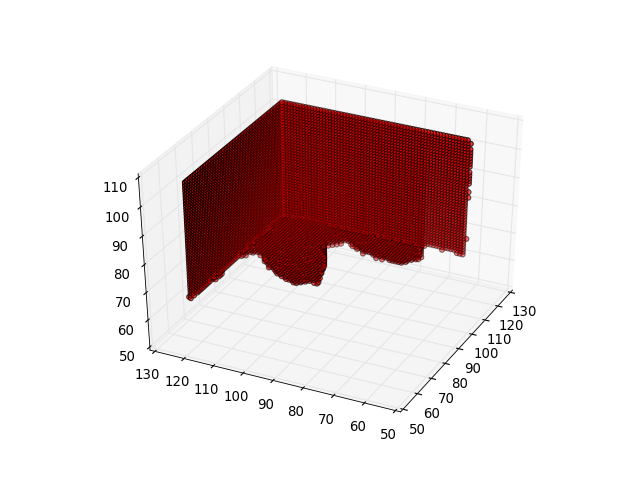

In [37]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', c= 'red')

In [19]:
def read_off(path):
    with open(path, 'r') as _file:
        if 'OFF' != _file.readline().strip():
            raise ValueError('Not a valid OFF header')
        n_verts, n_faces, n_dontknow = tuple([int(s) for s in _file.readline().strip().split(' ')])
        verts = []
        for i_vert in range(n_verts):
            verts.append([float(s) for s in _file.readline().strip().split(' ')])
        faces = []
        for i_face in range(n_faces):
            faces.append([int(s) for s in _file.readline().strip().split(' ')][1:])
        return np.array(verts), np.array(faces)
def plot_triangles(verts_np, patches):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(x, y, z, zdir='z', c= 'red')
    ax.plot_trisurf(verts_np[:,0],verts_np[:,1],verts_np[:,2],triangles=patches)

<IPython.core.display.Javascript object>


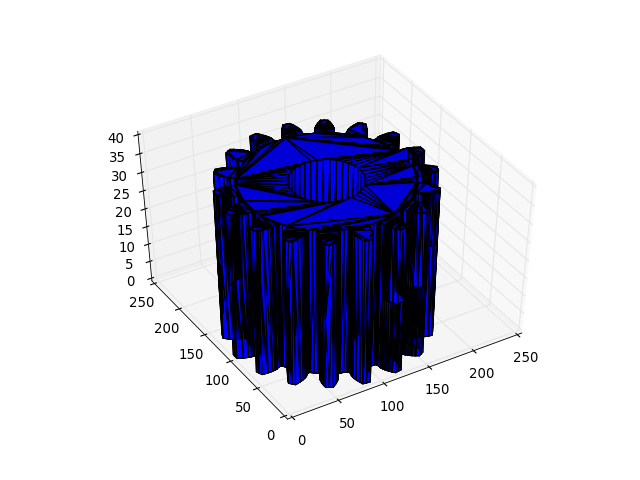

In [38]:
verts, patches = read_off(path)
plot_triangles(verts, patches)